# Objective is to find whether a person is Survived or not in Titanic accident depending upon the given features
# We're going to use Naive Bayes and Logistic regression to compare which is best for Classification


#### NOTE : explanation for Naive bayes is not given but logistic regression is given

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [65]:
df = pd.read_csv('C:/Users/adity/titanic_train.csv')

## Dropping NaN values & Unwanted columns 

In [66]:
df = df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
df = df.dropna(axis = 0)

# Making target and Features variables

In [67]:
target = df['Survived'].copy()
features = df.drop(['Survived'],axis = 1).copy()

# Encoding Sex and Embarked(As they're textual)

In [68]:
features['Sex'] = features['Sex'].replace(['male','female'],[1,0])
features['Embarked'] = features['Embarked'].replace(['C','S','Q'],[1,2,3])

In [222]:
print('Shape of Features :',features.shape)
print('Shape of Target :',target.shape)
######### SHOULD FIX THE TARGET SHAPE ##########

Shape of Features : (712, 7)
Shape of Target : (712,)


In [223]:
target = np.array(target)
target = target.reshape(1,len(target))

In [224]:
print('Shape of Features :',features.shape)
print('Shape of Target :',target.shape)

Shape of Features : (712, 7)
Shape of Target : (1, 712)


In [225]:
cov_pos = features[df['Survived']==1].cov()
cov_neg = features[df['Survived']==0].cov()

######## Both Give shape 7x7 ###########
################ CAUTION ##############
###### DO NOT USE NP.COV AS IT MAY RESULT IN INCORRECT CO-VARIANCE #######

In [226]:
mean_pos = np.mean(features[df['Survived']==1])
mean_neg = np.mean(features[df['Survived']==0])

In [227]:
mean_pos.shape
######### DO NOT WORRY ABOUT SHAPE, STILL IT GIVES PROPER RESULTS #########

(7,)

In [228]:
p_pos = len(features[df['Survived']==1])/len(features)
p_neg = len(features[df['Survived']==0])/len(features)

In [229]:
(features-mean_pos).shape

(712, 7)

In [230]:
np.linalg.inv(cov_pos).shape

(7, 7)

In [231]:
def prior_pos(x, mean_pos, cov_pos):
    return (1/(((2*np.pi)**len(features.T))*np.linalg.det(cov_pos))**0.5)*np.exp((-0.5)*np.dot(np.dot((x-mean_pos) ,np.linalg.inv(cov_pos)),(x-mean_pos).T))
def prior_neg(x, mean_neg, cov_neg):
    return (1/(((2*np.pi)**len(features.T))*np.linalg.det(cov_neg))**0.5)*np.exp((-0.5)*np.dot(np.dot((x-mean_neg) ,np.linalg.inv(cov_neg)),(x-mean_neg).T))
def posterior_pos(x, prior_pos, prior_neg, p_pos, p_neg):
    return ((prior_pos(x, mean_pos, cov_pos))*p_pos)/(((prior_pos(x, mean_pos, cov_pos))*p_pos)+((prior_neg(x, mean_neg, cov_neg))*p_neg))
def posterior_neg(x, prior_pos, prior_neg, p_pos, p_neg):
    return ((prior_neg(x, mean_neg, cov_neg))*p_neg)/(((prior_pos(x, mean_pos, cov_pos))*p_pos)+((prior_neg(x, mean_neg, cov_neg))*p_neg))

In [232]:
########## we are doing FEATURES.ILOC[i] to get post_pos value of each instance ###########

pred_class = []
for i in range(len(features)):
    q = (posterior_pos(features.iloc[i], prior_pos, prior_neg, p_pos, p_neg))
    r = (posterior_neg(features.iloc[i], prior_pos, prior_neg, p_pos, p_neg))
    if(q > r):
        pred_class.append(1)
    else:
        pred_class.append(0)


In [244]:
target = pd.DataFrame(target)

In [250]:
target[7][0]

1

In [253]:
def accuracy(predicted,actual):
  correct = 0
  for i in range(0,len(predicted)):
    if(predicted[i]==actual[i][0]):
      correct += 1
  return (correct/len(predicted))*100

In [254]:
accuracy(pred_class,target)

80.19662921348315

# Classification using Logistic Regression

In [100]:
###### USELESS FEATURE ########
features = features.drop(['SibSp'],axis=1)

In [103]:
target = np.array(target)
target = target.reshape(1,712)

In [101]:
print('Shape of features :',features.shape)
print('Shape of Target :',target.shape)

Shape of features : (712, 6)
Shape of Target : (1, 712)


## NORMALISING is important to avoid any errors and to achieve good accuracy

In [245]:
features = features/features.max()
target = target/target.max()

## Writing Functions

# This is Hypothesis function in Logistic Regression, 
## $$ p=\frac{1}{1+e^{-(mx+c)}} $$
### This gives values ranging from 0 to 1 which we're interested to get as our target var ranges from 0 to 1
### We are going to predict values using MLE instead of MSE as it gives very high error values
### First, we'll be finding log(p) for those values whose target var value is 1 and also find log(1-p) for those values whose target var value is 0


# By doing log, we get values ranging from -inf to +inf,
##  (i.e) $$ log(\frac{p}{1-p}) = \frac{log(\frac{1}{1+e^{-(mx+c)}})}{1+\frac{1}{1+e^{-(mx+c)}}}  $$
# We call this as "ODDS FUNCTION"


# For given some m & c values,
## if we compute log(p), we get some corresponing value in log(odds) graph.
## where log(p) is for those values whose target_var value is 1 and, similarly for log(1-p) , we get some value in log(odds) graph where log(1-p) is for those values whose target_var value is 0
## those values denotes our cost 

# Our goal is to reduce m and c values such that with good m and c, the "p" will be reduced and hence log will be reduced
## """""""""""Make sure log shouldn't return 1, if did, then, error becomes infinity""""""""""

In [243]:
def sigmoid(m,x,c):
    return 1/(1+np.exp(-(np.dot(m,x.T)+c)))
def cost(m,x,c,y):
    pred_class = []
    sig = sigmoid(m,x,c)
    d = 0.0005
    for i in range(len(x)):
        if(y[0][i] == 1):
            pred_class.append(-np.log(sigmoid(m,x.iloc[i],c)+d))  #### We add d to avoid values to go to 0.9999999 which may return log value to inf
        else:
            pred_class.append(-np.log(1-sigmoid(m,x.iloc[i],c)+d))
    pred_class = np.array(pred_class)
    pred_class = pred_class.reshape(1,712)   #For BroadCasting purposes
    return np.mean((pred_class))
def grad_m(m,x,c,y):
    grad= np.mean((sigmoid(m,x,c)-y)*x.T,axis=1)  #### Make sure formula is (yp - ya)
    grad = np.array(grad)
    grad = grad.reshape(1,6)
    return grad
def grad_c(m,x,c,y):
    return np.mean((sigmoid(m,x,c)-y))
def accuracy(m,x,c,y):
    y_pred=sigmoid(m,x,c)
    y_pred[y_pred>=0.5]=1   ### As y_pred in our case can be any value between 0 to 1
    y_pred[y_pred<0.5]=0
    correct=len(y_pred[y_pred==y])
    return correct/len(y.T)*100

In [247]:
m = np.random.randn(1,6)
c = random.random()

Error : 0.4490761703874182 Iteration : 999 Accuracy : 79.7752808988764


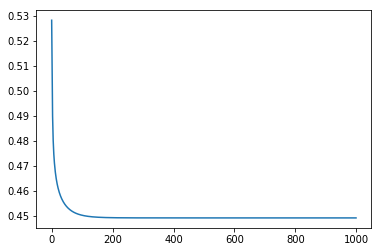

In [248]:
error = []
lr = 5   #### Already values are very small , and if lr is small, then it takes plenty of time
for i in range(1000):
    m = m-lr*grad_m(m,features,c,target)
    c = c-lr*grad_c(m,features,c,target)
    error.append(cost(m,features,c,target))
    clear_output(True)
    print('Error :',cost(m,features,c,target),'Iteration :',i,'Accuracy :',accuracy(m,features,c,target))
plt.plot(error)
plt.show()

# Conclusion : Naive Bayes is better for classifying Titanic Dataset than Logistic regression